# PSI3471 - Aula de Exercícios 04

# MLP e o backpropagation

Neste exercício vamos treinar uma rede MLP com o algoritmo backpropagation no modo mini-batch para o caso do XOR.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Vamos gerar os dados de treinamento do problema do XOR.

In [4]:
Nt = 500
x = np.round(np.random.uniform(0, 1, (Nt, 2)), 0)
d = 1 * (np.logical_xor(x[:, [0]], x[:, [1]]))

Vamos usar a sigmoide como função de ativação.

In [5]:
#sigmoid function
def sigmoid(X):
   return 1/(1+np.exp(-X))

A função abaixo implementa uma MLP de duas camadas com configuração 2-1 no modo de treinamento mini-batch.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [6]:
def redeMLP_21(x, d, eta, Nt, Nb, Ne, W01_1, W02_1, W01_2):
    """
    J_MSE, W1_1, W2_1, W1_2 = redeMLP(x, d, Nn, eta, Nt, Nb, Ne, W0)
    Saídas:
    J_MSE: valor da função custo ao longo das épocas
    W1_1: vetor de pesos do neurônio 1 da camada 1
    W2_1: vetor de pesos do neurônio 2 da camada 1
    W1_2: vetor de pesos do neurônio 1 da camada de saída
    Entradas:
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Nb: tamanho do mini-batch
    Ne: número de épocas
    W01_1: vetor de pesos do neurônio 1 da camada 1 (útlima iteração, inclui o bias)
    W02_1: vetor de pesos do neurônio 2 da camada 1 (útlima iteração, inclui o bias)
    W01_2: vetor de pesos o neurônio 1 da camada de saída (útlima iteração, inclui o bias)
    """


    # número de mini-batches por época
    Nmb = int(np.floor(Nt / Nb))

    # inicialização dos pesos
    W1_1 = W01_1.copy()
    W2_1 = W02_1.copy()
    W1_2 = W01_2.copy()

    # passo de adaptação dividido pelo tamanho do mini-batch
    eta = eta / Nb

    # inicialização do vetor que contém o valor da função custo
    J_MSE = np.zeros((Ne, 1))

    # Juntamos o vetor de entrada com o sinal desejado e inserimos
    # uma coluna de uns para levar em conta o bias
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # vetor de uns para o bias no mini-batch
    b = np.ones((Nb, 1))

    # for das épocas
    for k in range(Ne):
        np.random.shuffle(Xd)
        X = Xd[:, 0 : 3]
        d = Xd[:, [3]]

        # for dos mini-batches
        for l in range(Nmb):
            dmb = d[l * Nb : (l + 1) * Nb].reshape(-1, 1)
            X1mb = X[l * Nb : (l + 1) * Nb, :]

            #############
            # Complete o código

            # Cálculo Progressivo
            # Neurônio 1 da camada 1
            v1mb_1 = X1mb @ W1_1.T
            y1mb_1 = 1 / (1 + np.exp(-v1mb_1))
            dphi1_1 = y1mb_1 * (1 - y1mb_1)

            v2mb_1 = X1mb @ W2_1.T
            y2mb_1 = 1 / (1 + np.exp(-v2mb_1))
            dphi2_1 = y2mb_1 * (1 - y2mb_1)

            X2mb = np.hstack((b, y1mb_1, y2mb_1))
            v1mb_2 = X2mb @ W1_2.T
            y1mb_2 = 1 / (1 + np.exp(-v1mb_2))
            dphi1_2 = y1mb_2 * (1 - y1mb_2)

            e1mb_2 = dmb - y1mb_2

            delta1_2 = e1mb_2 * dphi1_2
            delta1_1 = (delta1_2 * W1_2[0, 1]) * dphi1_1
            delta2_1 = (delta1_2 * W1_2[0, 2]) * dphi2_1

            W1_2 = W1_2 + eta * (delta1_2.T @ X2mb)
            W1_1 = W1_1 + eta * (delta1_1.T @ X1mb)
            W2_1 = W2_1 + eta * (delta2_1.T @ X1mb)
            #############

            # guarda no vetor J_MSE a norma do vertor de erros de saída ao quadrado
            J_MSE[k] = (J_MSE[k] + (np.linalg.norm(e1mb_2)) ** 2)

        # cálculo do MSE (divide o valor acumulado pelo número de
        # mini-batches x tamanho do batch x número de neurônios
        # da camada de saída)
        J_MSE[k] = J_MSE[k] / (Nmb * Nb * 1)

        if k % 100 == 0:
            print(f"Época: {k}, MSE: {J_MSE[k]}")

    return J_MSE, W1_1, W2_1, W1_2

In [7]:
# Parâmetros da rede

# passo de adaptação do algoritmo backpropagation
eta = 0.9

# Inicialização dos pesos
W01_1 = 0.2 * np.random.rand(1, 3) - 0.01
W02_1 = 0.2 * np.random.rand(1, 3) - 0.01
W01_2 = 0.2 * np.random.rand(1, 3) - 0.01

Treinamento da MLP

In [8]:
# Treinamento

# Tamanho do mini-batch
Nb = 20

# Número de épocas
Ne = 5000

(J_MSE, W1_1, W2_1, W1_2) = redeMLP_21(x, d, eta, Nt, Nb, Ne, W01_1, W02_1, W01_2)

Época: 0, MSE: [0.25143012]
Época: 100, MSE: [0.25056399]
Época: 200, MSE: [0.25040873]
Época: 300, MSE: [0.01373877]
Época: 400, MSE: [0.00224245]
Época: 500, MSE: [0.00116469]
Época: 600, MSE: [0.00077785]
Época: 700, MSE: [0.00058119]
Época: 800, MSE: [0.00046272]
Época: 900, MSE: [0.00038378]
Época: 1000, MSE: [0.00032752]
Época: 1100, MSE: [0.00028544]
Época: 1200, MSE: [0.00025281]
Época: 1300, MSE: [0.00022678]
Época: 1400, MSE: [0.00020555]
Época: 1500, MSE: [0.0001879]
Época: 1600, MSE: [0.00017301]
Época: 1700, MSE: [0.00016028]
Época: 1800, MSE: [0.00014927]
Época: 1900, MSE: [0.00013967]
Época: 2000, MSE: [0.0001312]
Época: 2100, MSE: [0.0001237]
Época: 2200, MSE: [0.000117]
Época: 2300, MSE: [0.00011098]
Época: 2400, MSE: [0.00010554]
Época: 2500, MSE: [0.0001006]
Época: 2600, MSE: [9.61023523e-05]
Época: 2700, MSE: [9.19841998e-05]
Época: 2800, MSE: [8.82009578e-05]
Época: 2900, MSE: [8.47136855e-05]
Época: 3000, MSE: [8.14889329e-05]
Época: 3100, MSE: [7.84980537e-05]
Ép

(np.float64(0.0),
 np.float64(5000.0),
 np.float64(-44.358996875295404),
 np.float64(-4.990993830953533))

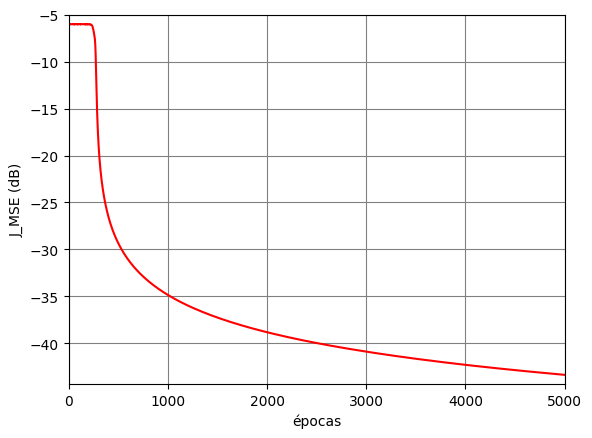

In [9]:
# Mostra a função custo ao longo das épocas

plt.figure()
J_MSEdB = 10 * np.log10(J_MSE)
plt.plot(J_MSEdB, "r")
plt.ylabel("J_MSE (dB)")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("épocas")
plt.axis([0, Ne, min(J_MSEdB) - 1, max(J_MSEdB) + 1])

Vamos gerar os dados de teste.

In [10]:
Nteste = 500
xteste = np.round(np.random.uniform(0, 1, (Nteste, 2)), 0)
dteste = 1 * (np.logical_xor(xteste[:, [0]], xteste[:, [1]]))

A função abaixo mantém os pesos fixos e faz apenas o cálculo progressivo para testar a rede treinada.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [11]:
def redeMLP_teste_21(x, d, W1_1, W2_1, W1_2, Nteste):
    """
    J_MSE,y = redeMLP_teste_21(x, d, W1_1, W2_1, W1_2, Nn, Nteste)
    Saídas:
    J_MSE: valor da função custo no teste
    y: saída da rede MLP
    Entradas:
    x: sinal de entrada
    d: sinal desejado
    W1_1: vetor de pesos do neurônio 1 da camada 1
    W2_1: vetor de pesos do neurônio 2 da camada 1
    W1_2: vetor de pesos do neurônio 1 da camada de saída
    Nteste: número de dados de teste
    """

    # insere 1's por causa do bias
    x = np.hstack((np.ones((Nteste, 1)), x))


    J_MSE = np.zeros((Nteste, 1))
    y = np.zeros((Nteste, 1))
    e = np.zeros((Nteste, 1))
    b = 1

    for n in range(Nteste):
        X1 = x[n, :]

        #############
        # Complete o código

        # cálculo progressivo com os pesos fixos da última época
        v1_1 = np.dot(W1_1, X1)
        y1_1 = np.tanh(v1_1)


        v2_1 = np.dot(W2_1, X1)
        y2_1 = np.tanh(v2_1)

        X2 = np.hstack((b, y1_1, y2_1))

        v1_2 = np.dot(W1_2, X2)
        y1_2 = np.tanh(v1_2)


        y[n, :] = y1_2
        e[n, :] = d[n, :] - y[n, :]
        J_MSE[n] = (J_MSE[n] + (np.linalg.norm(e[n, :])) ** 2) / (1)

    return J_MSE, y

Teste da rede MLP (apenas o cálculo progressivo com pesos da última época)

In [12]:
(J_MSEteste, yteste) = redeMLP_teste_21(xteste, dteste, W1_1, W2_1, W1_2, Nteste)

(np.float64(0.0),
 np.float64(500.0),
 np.float64(-91.48877416858491),
 np.float64(0.9999999999999739))

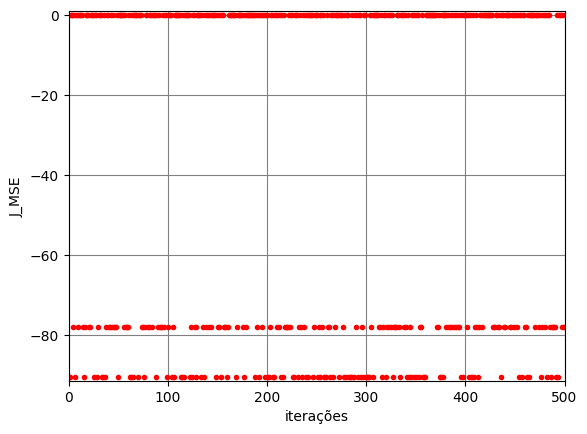

In [13]:
# Mostra a função custo com dados de teste em dB
plt.figure()
J_MSEtestedB = 10 * np.log10(J_MSEteste)
plt.plot(J_MSEtestedB, ".r")
plt.ylabel("J_MSE")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("iterações")
plt.axis([0, Nteste, min(J_MSEtestedB) - 1, max(J_MSEtestedB) + 1])

Vamos calcular a taxa de erro do teste.

In [14]:
yteste_dec = np.round(yteste, 0)  # arredonda a saída do teste

Taxa_de_erro = np.sum(np.absolute(dteste - yteste_dec)) * 100 / (2 * Nteste)
print(f"Taxa de erro: {Taxa_de_erro}")

Taxa de erro: 27.2


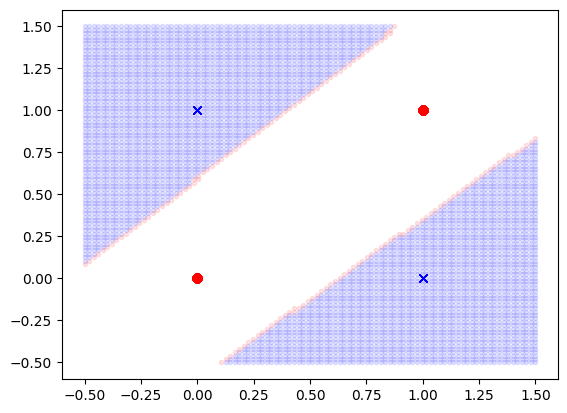

In [15]:
# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera arrays x e d (nesse caso, d é "qualquer", apenas usado
# pois é entrada obrigatória da função redeMLP_teste_21()
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
dgrid = np.zeros((Ngrid, 1))

# Calcula saída para cada ponto da grade
(J_MSEgrid, ygrid) = redeMLP_teste_21(xgrid, dgrid, W1_1, W2_1, W1_2, Ngrid)
ygrid_dec = np.round(ygrid, 0)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(Nteste):
    if dteste[i] == 1:
        ax2.plot(xteste[i, 0], xteste[i, 1], "xb")
    else:
        ax2.plot(xteste[i, 0], xteste[i, 1], "or")

# Plota pontos da grade com saída 0 (usa transparência alpha)
l0 = np.where(ygrid_dec == 0)[0]
ax2.plot(xgrid[l0, 0], xgrid[l0, 1], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid_dec == 1)[0]
ax2.plot(xgrid[l1, 0], xgrid[l1, 1], "b.", alpha=0.1)